In [4]:
pilotdata <- read.csv(file = 'data/PilotDataFile.csv', stringsAsFactors = FALSE)
head(pilotdata)

ï..blockcode,blocknum,trialnum,trialcode,sound.monosylsound.currentitem,response,latency,subject
consent,1,1,consent,Ba sound recording.wav,57,5167,1
myblock,2,1,mytrial,Ba sound recording.wav,57,2949,1
myblock,2,2,mytrial,Ba sound recording.wav,57,3166,1
myblock,2,3,mytrial,Ba sound recording.wav,57,3175,1
Practice,3,1,calibration,Ba sound recording.wav,57,3405,1
Practice,3,2,Practicetrial,Ba sound recording.wav,57,2733,1


In [19]:
shhh <- suppressPackageStartupMessages # stops annoying warnings when loading libraries
library(tidyr)
library(plyr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(MASS)
library(Matrix)
library(reshape2)
library(RColorBrewer)
library(DescTools)
library(grid)
library(wesanderson)
library('plot.matrix')

ERROR: Error in library(DescTools): there is no package called 'DescTools'


In [20]:
pilotdata$response <- ifelse(pilotdata$response == 'zerobutton', 0, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'onebutton', 1, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'twobutton', 2, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'threebutton', 3, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'fourbutton', 4, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'fivebutton', 5, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'sixbutton', 6, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'sevenbutton', 7, pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == 'centrebutton', '0.1', pilotdata$response)
pilotdata$response <- ifelse(pilotdata$response == '57', '0.57', pilotdata$response)
pilotdata$response <- as.numeric(pilotdata$response)
pilotdata$response

[1] 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57
  [15] 0.57 0.57 0.57 0.57 7.00 0.10 1.00 0.10 0.57 5.00 0.10 0.00 0.10 7.00
  [29] 0.10 5.00 0.10 5.00 0.10 1.00 0.10 4.00 0.10 1.00 0.10 6.00 0.10 3.00
  [43] 0.10 0.00 0.10 6.00 0.10 5.00 0.10 2.00 0.10 5.00 0.10 5.00 0.10 3.00
  [57] 0.10 1.00 0.10 0.00 0.10 5.00 0.10 3.00 0.10 0.00 0.10 2.00 0.10 7.00
  [71] 0.10 7.00 0.10 0.00 0.10 0.00 0.10 1.00 0.10 1.00 0.10 0.00 0.10 5.00
  [85] 0.10 7.00 0.10 7.00 0.10 3.00 0.10 5.00 0.10 0.00 0.10 0.00 0.10 6.00
  [99] 0.10 7.00 0.10 5.00 0.10 4.00 0.10 5.00 0.10 0.00 0.10 2.00 0.10 6.00
 [113] 0.10 3.00 0.10 7.00 0.10 7.00 0.10 0.00 0.10 0.00 0.10 0.00 0.10 6.00
 [127] 0.10 7.00 0.10 1.00 0.10 0.00 0.10 4.00 0.10 0.00 0.10 0.00 0.10 7.00
 [141] 0.10 7.00 0.10 1.00 0.10 3.00 0.10 2.00 0.10 6.00 0.10 7.00 0.10 5.00
 [155] 0.10 4.00 0.10 2.00 0.10 7.00 0.10 7.00 0.10 0.00 0.10 0.00 0.10 6.00
 [169] 0.10 3.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 0.00
 [183] 0.10 0.00 0.10 7.00 0.10 0.00 0.10 0.00 0.10 6.00 0.10 7.00 0.10 7.00
 [197] 0.10 5.00 0.10 1.00 0.10 4.00 0.10 1.00 0.10 7.00 0.10 7.00 0.10 7.00
 [211] 0.10 3.00 0.10 7.00 0.10 6.00 0.10 0.00 0.10 0.00 0.10 0.00 0.10 7.00
 [225] 0.10 7.00 0.10 7.00 0.10 2.00 0.10 6.00 0.10 0.00 0.10 1.00 0.10 7.00
 [239] 0.10 7.00 0.10 7.00 0.10 0.00 0.10 2.00 0.10 2.00 0.10 5.00 0.10 3.00
 [253] 0.10 1.00 0.10 6.00 0.10 3.00 0.10 1.00 0.10 0.00 0.10 7.00 0.10 7.00
 [267] 0.10 7.00 0.10 5.00 0.10 0.00 0.10 1.00 0.10 7.00 0.10 7.00 0.10 6.00
 [281] 0.10 7.00 0.10 3.00 0.10 7.00 0.10 4.00 0.10 0.00 0.10 7.00 0.10 6.00
 [295] 0.10 4.00 0.10 7.00 0.10 7.00 0.10 0.00 0.10 1.00 0.10 3.00 0.10 7.00
 [309] 0.10 3.00 0.10 5.00 0.10 1.00 0.10 4.00 0.10 1.00 0.10 4.00 0.10 4.00
 [323] 0.10 3.00 0.10 1.00 0.10 1.00 0.10 7.00 0.10 2.00 0.10 0.00 0.10 7.00
 [337] 0.10 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57
 [351] 0.57 0.57 0.57 0.57 0.57 3.00 0.10 7.00 0.10 0.57 7.00 0.10 7.00 0.10
 [365] 2.00 0.10 2.00 0.10 4.00 0.10 7.00 0.10 0.00 0.10 7.00 0.10 7.00 0.10
 [379] 2.00 0.10 7.00 0.10 0.00 0.10 7.00 0.10 4.00 0.10 0.00 0.10 1.00 0.10
 [393] 4.00 0.10 0.00 0.10 0.00 0.10 1.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10
 [407] 7.00 0.10 7.00 0.10 6.00 0.10 1.00 0.10 1.00 0.10 7.00 0.10 3.00 0.10
 [421] 7.00 0.10 5.00 0.10 5.00 0.10 7.00 0.10 7.00 0.10 3.00 0.10 4.00 0.10
 [435] 7.00 0.10 2.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10
 [449] 2.00 0.10 3.00 0.10 7.00 0.10 3.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10
 [463] 2.00 0.10 1.00 0.10 3.00 0.10 1.00 0.10 1.00 0.10 2.00 0.10 0.00 0.10
 [477] 7.00 0.10 4.00 0.10 1.00 0.10 7.00 0.10 0.00 0.10 7.00 0.10 7.00 0.10
 [491] 7.00 0.10 0.00 0.10 7.00 0.10 7.00 0.10 1.00 0.10 5.00 0.10 0.00 0.10
 [505] 1.00 0.10 3.00 0.10 5.00 0.10 1.00 0.10 7.00 0.10 3.00 0.10 7.00 0.10
 [519] 3.00 0.10 1.00 0.10 0.00 0.10 1.00 0.10 5.00 0.10 7.00 0.10 7.00 0.10
 [533] 5.00 0.10 1.00 0.10 7.00 0.10 1.00 0.10 7.00 0.10 7.00 0.10 1.00 0.10
 [547] 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 0.00 0.10 7.00 0.10 2.00 0.10
 [561] 7.00 0.10 2.00 0.10 7.00 0.10 7.00 0.10 6.00 0.10 4.00 0.10 2.00 0.10
 [575] 7.00 0.10 7.00 0.10 1.00 0.10 7.00 0.10 2.00 0.10 3.00 0.10 5.00 0.10
 [589] 0.00 0.10 1.00 0.10 0.00 0.10 0.00 0.10 7.00 0.10 5.00 0.10 7.00 0.10
 [603] 1.00 0.10 0.00 0.10 7.00 0.10 0.00 0.10 7.00 0.10 7.00 0.10 4.00 0.10
 [617] 7.00 0.10 7.00 0.10 2.00 0.10 7.00 0.10 1.00 0.10 7.00 0.10 7.00 0.10
 [631] 7.00 0.10 3.00 0.10 3.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 4.00 0.10
 [645] 7.00 0.10 1.00 0.10 4.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10 7.00 0.10
 [659] 3.00 0.10 1.00 0.10 3.00 0.10 7.00 0.10 1.00 0.10 7.00 0.10 0.00 0.10
 [673] 7.00 0.10 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57 0.57
 [687] 0.57 0.57 0.57 0.57 0.57 0.57 1.00 0.10 1.00 0.10 0.57 7.00 0.10 5.00
 [701] 0.10 1.00 0.10 5.00 0.10 4.00 0.10 6.00 0.10 7.00 0.10 3.00 0.10 7.00
 [715] 0.10 6.00 0.10 0.00 0.10 1.00 0.10 0.00 0.10 6.00 0.10 4.00 0.10 4.00

,ï..blockcode,blocknum,trialnum,trialcode,sound.monosylsound.currentitem,response,latency,subject
26,InitialMonosyllabicSounds,4,3,Gabackwardsound,Da sound recording.wav,0,916,1
28,InitialMonosyllabicSounds,4,5,Basound,Ba sound recording.wav,7,1726,1
30,InitialMonosyllabicSounds,4,7,Babackwardsound,Ba sound recording.wav,5,3706,1
32,InitialMonosyllabicSounds,4,9,Gasound,Pa backward.wav,5,2739,1
34,InitialMonosyllabicSounds,4,11,Tabackwardsound,Ka backward.wav,1,1934,1
36,InitialMonosyllabicSounds,4,13,Kasound,Ga backward.wav,4,1732,1
40,InitialMonosyllabicSounds,4,17,Gasound,Da backward.wav,6,3058,1
42,InitialMonosyllabicSounds,4,19,Dasound,Ba sound recording.wav,3,1205,1
46,InitialMonosyllabicSounds,4,23,Gabackwardsound,Ta sound recording.wav,6,3311,1
48,InitialMonosyllabicSounds,4,25,Kasound,Da backward.wav,5,2321,1


dataanaly.trialcode,dataanaly.sound.monosylsound.currentitem,variable,value
Gabackwardsound,Da sound recording.wav,as.numeric.dataanaly.response.,0
Basound,Ba sound recording.wav,as.numeric.dataanaly.response.,7
Babackwardsound,Ba sound recording.wav,as.numeric.dataanaly.response.,5
Gasound,Pa backward.wav,as.numeric.dataanaly.response.,5
Tabackwardsound,Ka backward.wav,as.numeric.dataanaly.response.,1
Kasound,Ga backward.wav,as.numeric.dataanaly.response.,4


Using dataanaly.trialcode, dataanaly.sound.monosylsound.currentitem as id variables


,Baback.wav,Basound.wav,Daback.wav,Dasound.wav,Gaback.wav,Gasound.wav,Kaback.wav,Kasound.wav,Paback.wav,Pasound.wav,Taback.wav,Tasound.wav
Babackwardsound,0,5,2,7,0,7,1,7,1,7,0,7
Basound,7,7,7,4,6,4,6,3,4,3,5,4
Dabackwardsound,0,7,0,7,0,7,0,5,1,5,0,7
Dasound,7,3,7,0,7,0,3,1,7,3,7,2
Gabackwardsound,1,7,0,0,1,6,1,7,2,7,2,6
Gasound,7,3,6,0,7,0,7,3,5,3,5,3
Kabackwardsound,1,7,2,5,0,7,0,5,0,7,0,6
Kasound,5,4,5,2,4,3,5,0,6,4,7,0
Pabackwardsound,0,6,0,7,1,7,0,6,1,7,0,7
Pasound,5,3,7,4,7,1,7,1,7,1,5,0


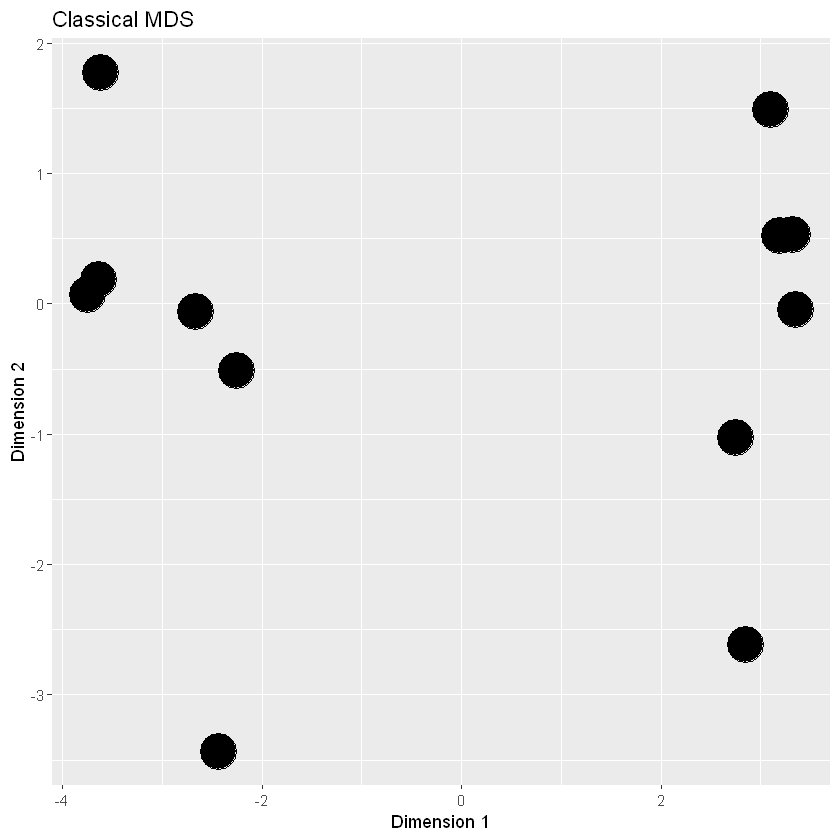

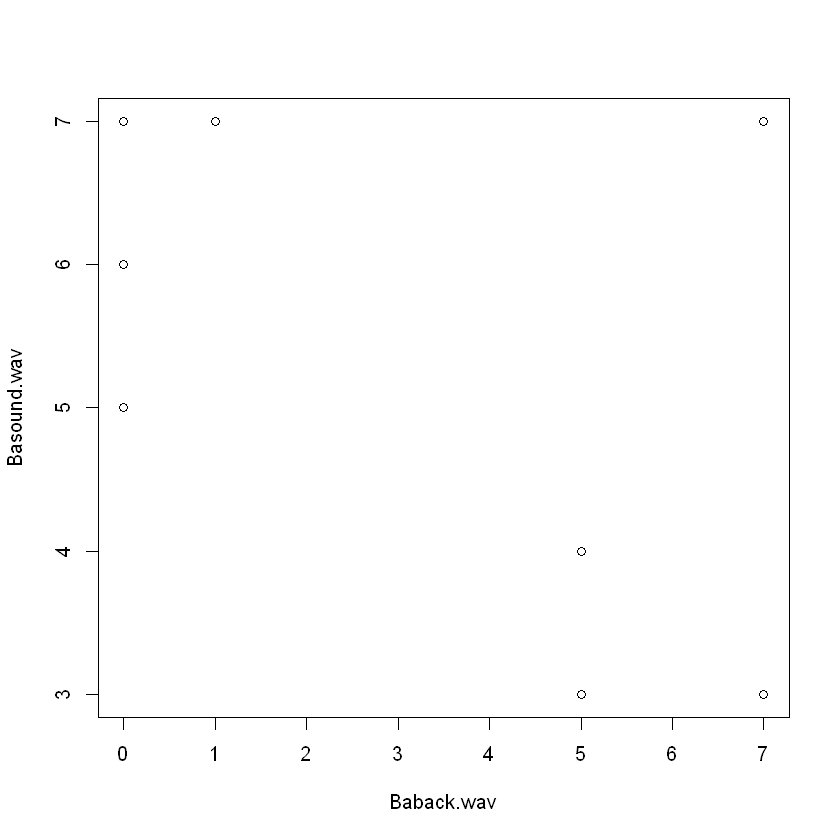

In [21]:
dataanaly <- subset(pilotdata, blocknum == 4 & response != "0.1" & subject == 1 & trialcode != "catchtrial" & trialcode != "centremouse") #specifying specific portion of data to be analysed
pilotdataanaly <- data.frame(dataanaly$trialcode, dataanaly$sound.monosylsound.currentitem, as.numeric(dataanaly$response))
dataanaly
head(melt(data = pilotdataanaly, id.vars = c("dataanaly.trialcode", "dataanaly.sound.monosylsound.currentitem")), measure.vars = c("dataanaly.response"))
test.df <- melt(pilotdataanaly) %>% spread(dataanaly.sound.monosylsound.currentitem, value)
test.matrix <- as.matrix(test.df)

actual.matrix <-test.matrix[,!colnames(test.matrix) %in% 'variable']

colnames(actual.matrix)[2] <- "Baback.wav"
colnames(actual.matrix)[3] <- "Basound.wav"
colnames(actual.matrix)[4] <- "Daback.wav"
colnames(actual.matrix)[5] <- "Dasound.wav"
colnames(actual.matrix)[6] <- "Gaback.wav"
colnames(actual.matrix)[7] <- "Gasound.wav"
colnames(actual.matrix)[8] <- "Kaback.wav"
colnames(actual.matrix)[9] <- "Kasound.wav"
colnames(actual.matrix)[10] <- "Paback.wav"
colnames(actual.matrix)[11] <- "Pasound.wav"
colnames(actual.matrix)[12] <- "Taback.wav"
colnames(actual.matrix)[13] <- "Tasound.wav"
rownames(actual.matrix) <- c("Babackwardsound", "Basound", "Dabackwardsound", "Dasound", "Gabackwardsound", "Gasound", "Kabackwardsound", "Kasound", "Pabackwardsound", "Pasound", "Tabackwardsound", "Tasound")
realmatrix <- actual.matrix[,!colnames(actual.matrix) %in% 'dataanaly.trialcode']
class(realmatrix) <- "numeric"
realmatrix
fit <- cmdscale(realmatrix, 2)
fit <- as.data.frame(fit)
plot <- ggplot(fit, aes(x=V1, y=V2)) +geom_point(size = 10) +xlab('Dimension 1') + ylab('Dimension 2') + ggtitle('Classical MDS') + scale_colour_identity()
plot
